Gio Fiore 11/19 Analysis Report

I think that Playboi Carti’s 2020 album Whole Lotta Red (WLR) has more danceability and energy than his 2018 album Die Lit (DL) and this will lead to the tracks having more popularity this difference may contribute to WLR's tracks achieving greater popularity, as these characteristics often resonate more with listeners and align with contemporary trends in hip-hop. By comparing the two albums, this analysis aims to explore how shifts in musical elements influence audience engagement and track success over time. 

I’m going to collect the track features endpoint but focus on the popularity, danceability, and energy then find the average of these to test my hypothesis. This data is reliable because it is coming directly from Spotify, but the popularity score is unreliable because it updates in real time and may not be an accurate representation of the all time popularity of the songs. 

In [3]:
import pandas as pd 
import json
import urllib
import requests
import base64

In [4]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).\
                                   encode("ascii")) 
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url,
                           data = data,
                           headers = header)
    print(response.status_code)
    return response.json()['access_token']

Setup to get sessionID and sessionKey for Spotify Dev tools

In [5]:
keys = pd.read_csv("keys.txt")
#keys

Adding keys to notebook

In [6]:
access_token = get_session_token(keys['Client_ID'].iloc[0], keys['Client_Secret'].iloc[0])
#access_token

200


Making sure session tokens are 200

In [7]:
t_features_ep = 'https://api.spotify.com/v1/audio-features'
tracks_ep = 'https://api.spotify.com/v1/tracks'
ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'

Setting up endpoints

In [8]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

Setting up api call for showing tracks and track features

In [9]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)} 

Setting up session header for track features

In [10]:
wlr_album_id = '2QRedhP5RmKJiJ1i8VgDGR'
dl_album_id = '7dAm8ShwJLFm9SaJ6Yc58O'

Album IDs for WLR and DL

In [11]:
ab_tracks_ep.format(wlr_album_id)

'https://api.spotify.com/v1/albums/2QRedhP5RmKJiJ1i8VgDGR/tracks'

In [12]:
ab_tracks_ep.format(dl_album_id)

'https://api.spotify.com/v1/albums/7dAm8ShwJLFm9SaJ6Yc58O/tracks'

In [13]:
wlr_album_response = api_call(ab_tracks_ep.format(wlr_album_id), session_header)
#wlr_album_response

200


In [14]:
dl_album_response = api_call(ab_tracks_ep.format(dl_album_id), session_header)
#dl_album_response

200


Making sure WLR & DL album ids are correct

In [15]:
wlr_album_df = pd.DataFrame(wlr_album_response['items'])
#wlr_album_df

In [16]:
dl_album_df = pd.DataFrame(dl_album_response['items'])
#dl_album_df

Setting up data frames for WLR & DL

In [17]:
wlr_track_ids = ','.join(wlr_album_df['id'].to_list())
#wlr_track_ids

In [18]:
dl_track_ids = ','.join(dl_album_df['id'].to_list())
#dl_track_ids

Adding all album track ids to one piece of code to use track features easier.

In [19]:
wlr_track_features = api_call(t_features_ep + '?ids={}'.format(wlr_track_ids),
                             session_header)
dl_track_features = api_call(t_features_ep + '?ids={}'.format(dl_track_ids),
                             session_header)

200
200


Setting up track features for both albums

In [20]:
wlr_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(wlr_track_ids),
                             session_header)
dl_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(dl_track_ids),
                             session_header)

200
200


Setting up track info for both albums

In [21]:
wlr_features_df = pd.DataFrame(wlr_track_features['audio_features'])
#wlr_features_df

In [22]:
dl_features_df = pd.DataFrame(dl_track_features['audio_features'])
#dl_features_df

Dataframes for both albums track features

In [23]:
wlr_tracks_df = pd.DataFrame(wlr_track_info['tracks'])
#wlr_tracks_df

In [24]:
dl_tracks_df = pd.DataFrame(dl_track_info['tracks'])
#dl_tracks_df

Dataframe for both albums tracks to set up a merge of both to compare data 

In [25]:
wlr_merged = pd.merge(wlr_features_df, wlr_tracks_df,
         how = 'inner', on = 'id')
wlr_merged.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,external_urls,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y
0,0.773,0.612,8,-5.730,1,0.2320,0.03980,0.000000,0.1420,0.3810,...,{'spotify': 'https://open.spotify.com/track/3c...,https://api.spotify.com/v1/tracks/3cWmqvMwVQKD...,False,True,Rockstar Made,68,None,1,track,spotify:track:3cWmqvMwVQKDigWLSZ3w9h
1,0.693,0.434,4,-8.786,0,0.3850,0.20400,0.000000,0.2770,0.5420,...,{'spotify': 'https://open.spotify.com/track/0F...,https://api.spotify.com/v1/tracks/0F13K9dwYH2z...,False,True,Go2DaMoon (feat. Kanye West),64,None,2,track,spotify:track:0F13K9dwYH2zpTWiR8d628
2,0.856,0.570,9,-4.486,1,0.2860,0.00637,0.000000,0.0984,0.1550,...,{'spotify': 'https://open.spotify.com/track/2l...,https://api.spotify.com/v1/tracks/2lLG56qpLP3U...,False,True,Stop Breathing,69,None,3,track,spotify:track:2lLG56qpLP3UbcLuzMvkWX
3,0.923,0.562,1,-7.357,1,0.3040,0.02130,0.000000,0.0726,0.4990,...,{'spotify': 'https://open.spotify.com/track/4C...,https://api.spotify.com/v1/tracks/4CYTQpr2jc4u...,False,True,Beno!,60,None,4,track,spotify:track:4CYTQpr2jc4uBScYvpEK2w
4,0.870,0.461,1,-5.786,1,0.2010,0.00456,0.000000,0.1100,0.4850,...,{'spotify': 'https://open.spotify.com/track/0c...,https://api.spotify.com/v1/tracks/0cgD36xPIJBd...,False,True,JumpOutTheHouse,60,None,5,track,spotify:track:0cgD36xPIJBdKUNJRHYDgP
5,0.657,0.604,0,-6.045,1,0.0374,0.02130,0.000000,0.1560,0.1220,...,{'spotify': 'https://open.spotify.com/track/7z...,https://api.spotify.com/v1/tracks/7zLMYtNJcabv...,False,True,M3tamorphosis (feat. Kid Cudi),60,None,6,track,spotify:track:7zLMYtNJcabv4h4wBnjNQI
6,0.885,0.661,4,-5.062,0,0.1410,0.16500,0.000000,0.3340,0.4360,...,{'spotify': 'https://open.spotify.com/track/1e...,https://api.spotify.com/v1/tracks/1eMNW1HQjF1d...,False,True,Slay3r,59,None,7,track,spotify:track:1eMNW1HQjF1dbb4GtnmpaX
7,0.719,0.852,0,-5.232,1,0.1490,0.02400,0.000000,0.1230,0.4320,...,{'spotify': 'https://open.spotify.com/track/6i...,https://api.spotify.com/v1/tracks/6i6whmV36EJm...,False,True,No Sl33p,58,None,8,track,spotify:track:6i6whmV36EJmxs5zFahMrb
8,0.819,0.638,10,-4.831,0,0.2260,0.03100,0.000116,0.1520,0.1670,...,{'spotify': 'https://open.spotify.com/track/4t...,https://api.spotify.com/v1/tracks/4txKMpsSfZRV...,False,True,New Tank,71,None,9,track,spotify:track:4txKMpsSfZRV6durPuHVq0
9,0.437,0.671,1,-4.985,1,0.1220,0.00124,0.000010,0.1360,0.0936,...,{'spotify': 'https://open.spotify.com/track/5u...,https://api.spotify.com/v1/tracks/5uYqmEN6TAAE...,False,True,Teen X (feat. Future),58,None,10,track,spotify:track:5uYqmEN6TAAE8ss8YmprNV


In [26]:
dl_merged = pd.merge(dl_features_df, dl_tracks_df,
         how = 'inner', on = 'id')
dl_merged.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,external_urls,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y
0,0.472,0.861,4,-3.966,0,0.0447,0.2830,0.000000,0.830,0.358,...,{'spotify': 'https://open.spotify.com/track/4I...,https://api.spotify.com/v1/tracks/4IO2X2YoXoUM...,False,True,Long Time - Intro,73,None,1,track,spotify:track:4IO2X2YoXoUMv0M2rwomLC
1,0.725,0.725,8,-6.067,0,0.1590,0.0119,0.000000,0.086,0.515,...,{'spotify': 'https://open.spotify.com/track/3L...,https://api.spotify.com/v1/tracks/3L0IKstjUgDF...,False,True,R.I.P.,74,None,2,track,spotify:track:3L0IKstjUgDFVQAbQIRZRv
2,0.754,0.775,7,-5.077,1,0.0660,0.0302,0.000000,0.362,0.159,...,{'spotify': 'https://open.spotify.com/track/1J...,https://api.spotify.com/v1/tracks/1JgkiUg9mSXS...,False,True,Lean 4 Real (feat. Skepta),66,None,3,track,spotify:track:1JgkiUg9mSXSwcb5Gbi4Ur
3,0.716,0.619,2,-10.227,1,0.3390,0.0271,0.000000,0.342,0.584,...,{'spotify': 'https://open.spotify.com/track/0s...,https://api.spotify.com/v1/tracks/0syXbGoFZbTM...,False,True,Old Money,60,None,4,track,spotify:track:0syXbGoFZbTMXm8hGCEvW0
4,0.724,0.450,4,-5.763,0,0.0497,0.0315,0.000014,0.111,0.464,...,{'spotify': 'https://open.spotify.com/track/3K...,https://api.spotify.com/v1/tracks/3K6U7TamNyVS...,False,True,Love Hurts (feat. Travis Scott),65,None,5,track,spotify:track:3K6U7TamNyVSWcFH8pCQHX
5,0.673,0.649,1,-8.433,0,0.1960,0.1880,0.000000,0.122,0.470,...,{'spotify': 'https://open.spotify.com/track/2B...,https://api.spotify.com/v1/tracks/2BJSMvOGABRx...,False,True,Shoota (feat. Lil Uzi Vert),74,None,6,track,spotify:track:2BJSMvOGABRxokHKB0OI8i
6,0.687,0.602,6,-5.005,0,0.0660,0.1380,0.000000,0.203,0.309,...,{'spotify': 'https://open.spotify.com/track/47...,https://api.spotify.com/v1/tracks/475jSz0H6U3d...,False,True,Right Now (feat. Pi'erre Bourne),61,None,7,track,spotify:track:475jSz0H6U3duJyNiDS0tT
7,0.894,0.590,9,-5.716,1,0.2210,0.0969,0.000009,0.329,0.576,...,{'spotify': 'https://open.spotify.com/track/2r...,https://api.spotify.com/v1/tracks/2rPSFKzGeqUW...,False,True,Poke It Out (with Nicki Minaj),59,None,8,track,spotify:track:2rPSFKzGeqUWwfcCFVkkq3
8,0.722,0.686,7,-6.173,0,0.2400,0.3160,0.000000,0.352,0.435,...,{'spotify': 'https://open.spotify.com/track/5w...,https://api.spotify.com/v1/tracks/5wPyd3IQAZft...,False,True,Home (KOD),62,None,9,track,spotify:track:5wPyd3IQAZft1vmxoIqGrU
9,0.657,0.668,2,-6.208,1,0.1360,0.0273,0.000000,0.320,0.227,...,{'spotify': 'https://open.spotify.com/track/1s...,https://api.spotify.com/v1/tracks/1s9DTymg5UQr...,False,True,Fell In Luv (feat. Bryson Tiller),73,None,10,track,spotify:track:1s9DTymg5UQrdorZf43JQm


The average energy of WLR is 0.607 while the average energy of DL is 0.663. Die Lit has a higher average energy across the first 10 songs.

The average danceability of WLR is 0.763 while the average danceability of DL is 0.702. Whole Lotta Red has a higher average danceability across the first 10 songs.

The average popularity of WLR is 63.5 while the average popularity of DL is 66.9. Die lit has a higher average popularity across the first 10 songs.

Based on this my hypothesis is incorrect because based on the first 10 songs from each album WLR only has a higher average danceability score while DL has a higher average energy and has a higher popularity average. 

Another way I can test my hypopthesis is instead take the top 5 songs with the highest popularity scores and see if this makes any difference.

In [27]:
wlr_top5 = wlr_merged.sort_values(by=['popularity'], ascending=False).head(5)
wlr_top5

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,external_urls,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y
18,0.785,0.903,2,-4.184,1,0.2100,0.25800,0.000000,0.1690,0.565,...,{'spotify': 'https://open.spotify.com/track/29...,https://api.spotify.com/v1/tracks/29TPjc8wxfz4...,False,True,Sky,79,None,19,track,spotify:track:29TPjc8wxfz4XMn21O7VsZ
11,0.642,0.690,11,-5.101,1,0.2610,0.00599,0.000001,0.3220,0.641,...,{'spotify': 'https://open.spotify.com/track/4C...,https://api.spotify.com/v1/tracks/4CzhtKifG867...,False,True,Vamp Anthem,73,None,12,track,spotify:track:4CzhtKifG867Lu5DNQVBSA
8,0.819,0.638,10,-4.831,0,0.2260,0.03100,0.000116,0.1520,0.167,...,{'spotify': 'https://open.spotify.com/track/4t...,https://api.spotify.com/v1/tracks/4txKMpsSfZRV...,False,True,New Tank,71,None,9,track,spotify:track:4txKMpsSfZRV6durPuHVq0
19,0.622,0.946,7,-3.593,0,0.0534,0.04400,0.000000,0.0838,0.336,...,{'spotify': 'https://open.spotify.com/track/08...,https://api.spotify.com/v1/tracks/08dz3ygXyFur...,False,True,Over,69,None,20,track,spotify:track:08dz3ygXyFur6bL7Au8u8J
2,0.856,0.570,9,-4.486,1,0.2860,0.00637,0.000000,0.0984,0.155,...,{'spotify': 'https://open.spotify.com/track/2l...,https://api.spotify.com/v1/tracks/2lLG56qpLP3U...,False,True,Stop Breathing,69,None,3,track,spotify:track:2lLG56qpLP3UbcLuzMvkWX


The 5 most popular songs from WLR are Sky, Vamp Anthem, New Tank, Stop Breathing, and Over. With an average of 72.6.

These songs have an average energy of 0.749.

These songs have an average danceability of 0.745.

In [28]:
dl_top5 = dl_merged.sort_values(by=['popularity'], ascending=False).head(5)
dl_top5

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,external_urls,href,is_local,is_playable,name,popularity,preview_url,track_number,type_y,uri_y
5,0.673,0.649,1,-8.433,0,0.1960,0.1880,0.0,0.122,0.470,...,{'spotify': 'https://open.spotify.com/track/2B...,https://api.spotify.com/v1/tracks/2BJSMvOGABRx...,False,True,Shoota (feat. Lil Uzi Vert),74,None,6,track,spotify:track:2BJSMvOGABRxokHKB0OI8i
1,0.725,0.725,8,-6.067,0,0.1590,0.0119,0.0,0.086,0.515,...,{'spotify': 'https://open.spotify.com/track/3L...,https://api.spotify.com/v1/tracks/3L0IKstjUgDF...,False,True,R.I.P.,74,None,2,track,spotify:track:3L0IKstjUgDFVQAbQIRZRv
0,0.472,0.861,4,-3.966,0,0.0447,0.2830,0.0,0.830,0.358,...,{'spotify': 'https://open.spotify.com/track/4I...,https://api.spotify.com/v1/tracks/4IO2X2YoXoUM...,False,True,Long Time - Intro,73,None,1,track,spotify:track:4IO2X2YoXoUMv0M2rwomLC
9,0.657,0.668,2,-6.208,1,0.1360,0.0273,0.0,0.320,0.227,...,{'spotify': 'https://open.spotify.com/track/1s...,https://api.spotify.com/v1/tracks/1s9DTymg5UQr...,False,True,Fell In Luv (feat. Bryson Tiller),73,None,10,track,spotify:track:1s9DTymg5UQrdorZf43JQm
10,0.762,0.705,6,-5.195,0,0.1640,0.0906,0.0,0.170,0.264,...,{'spotify': 'https://open.spotify.com/track/50...,https://api.spotify.com/v1/tracks/500l6Cwe40hk...,False,True,Foreign,70,None,11,track,spotify:track:500l6Cwe40hkPqS7Sf7ufY


The 5 most popular songs from DL are Shoota, R.I.P., Fell in Luv, Long Time, and Foreign. With an average of 72.8.

These songs have an average energy of 0.722.

These songs have an average danceability of 0.658.

Taking the 5 most popular songs from each album shows that DL has a slightly higher average popularity score but WLR has a higher average energy and danceability. 

In conclusion, based on the data collected from the first 10 songs of each album and the 5 most popular songs my hypothesis was incorrect because in both situations the energy and danceability of the songs had no effect on the popularity. 

Since popularity is an unreliable metric in this case, another way to test this hypothesis would be to manually get the number of streams from each album and see if this has any difference. 

In [29]:
from matplotlib import pyplot as plt

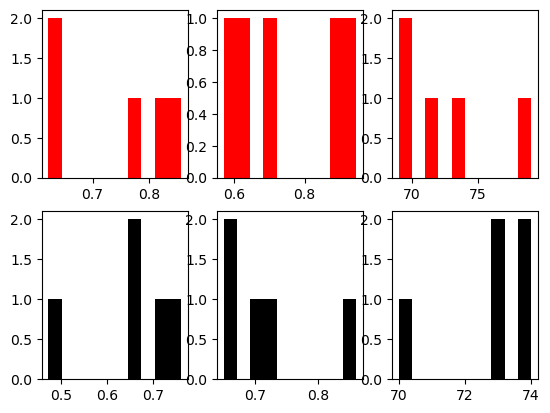

In [30]:
fig1, ax1 = plt.subplots(2, 3)
ax1[0,0].hist(wlr_top5['danceability'], color = 'red')
ax1[0,1].hist(wlr_top5['energy'], color = 'red')
ax1[0,2].hist(wlr_top5['popularity'], color = 'red')

ax1[1,0].hist(dl_top5['danceability'], color = 'black')
ax1[1,1].hist(dl_top5['energy'], color = 'black')
ax1[1,2].hist(dl_top5['popularity'], color = 'black')

plt.show()

These histograms are comparing the top 5 songs on each album by their danceability, energy, and popularity in that order. This did not change any information from my hypothesis it instead just shows it in an easier way so that I do not have to get the averages of every songs danceability, energy, and popularity.

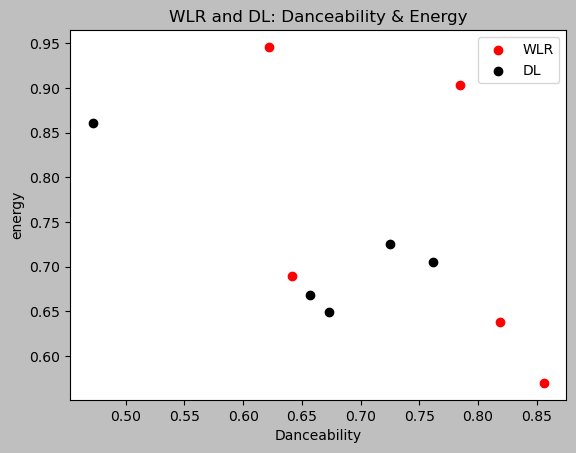

In [41]:
fig2, ax2 = plt.subplots()
wlr_scatter = ax2.scatter(wlr_top5['danceability'], wlr_top5['energy'], color = 'red', label = 'WLR')
dl_scatter = ax2.scatter(dl_top5['danceability'], dl_top5['energy'], color = 'black', label = 'DL')
ax2.set_xlabel('Danceability')
ax2.set_ylabel('energy')
ax2.set_title('WLR and DL: Danceability & Energy')
ax2.legend(['WLR = red', 'DL = black'])

plt.legend(handles = [wlr_scatter, dl_scatter])
plt.show()

This figure shows how the danceability and energy relate on the top 5 songs between WLR and DL. This plot is helpful to my hypothesis because it shows me that only 2 songs from WLR have more energy compared to DL where 3 of the songs have more energy. Same with danceability where 3 songs from WLR have more danceability compared to DL that has 4 songs with more danceability than the last 2 of WLR.

In conclusion, building these 2 plots helped me interpret the data differently even though it did not change my hypothesis. These 2 figures helped prove that my hypothesis was incorrect and that energy and danceability do not affect the songs' popularity. I don't feel that coming back to this hypothesis in the future would be necessary as every way that I have tried so far to prove my hypothesis has been incorrect. This analysis helped show me that using data guide conclusions is a better way of going than assumptions. In the future I can do this with different datasets to see if maybe this was an outlier case and that danceability and energy DO have an affect on a song's popularity.